In [ ]:
from warnings import filterwarnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from tensorflow.keras.models import Sequential
from keras import layers
import tensorflow as tf

In [ ]:
import os
import os.path
from pathlib import Path
import cv2
import pandas as pd

In [ ]:
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

# **PATH PROCESS**

In [ ]:
dataset_path = Path("/content/drive/MyDrive/training_set")

In [ ]:
filepath = list(dataset_path.glob(r"**/*.jpg"))

In [ ]:
print(filepath[10])

/content/drive/MyDrive/training_set/Openness/IMG_20200215_182050.jpg


In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

# **Data for Visualization**

In [ ]:
filepath = pd.Series(filepath, name='Filepath').astype(str)

In [ ]:
print(labels[10])

Openness


In [ ]:
labels = pd.Series(labels,name="Labels")

In [ ]:
ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))

In [ ]:
ListA = pd.Series(ListA,name="Array")

In [ ]:
MainData = pd.concat([ListA,labels],axis=1)

# **To protect main data**

In [ ]:
data = MainData.copy()

In [ ]:
print(data["Labels"].value_counts())

Labels
Openness             50
Agreeableness        24
Neuroticism          24
Conscientiousness    22
Extraversion          6
Name: count, dtype: int64


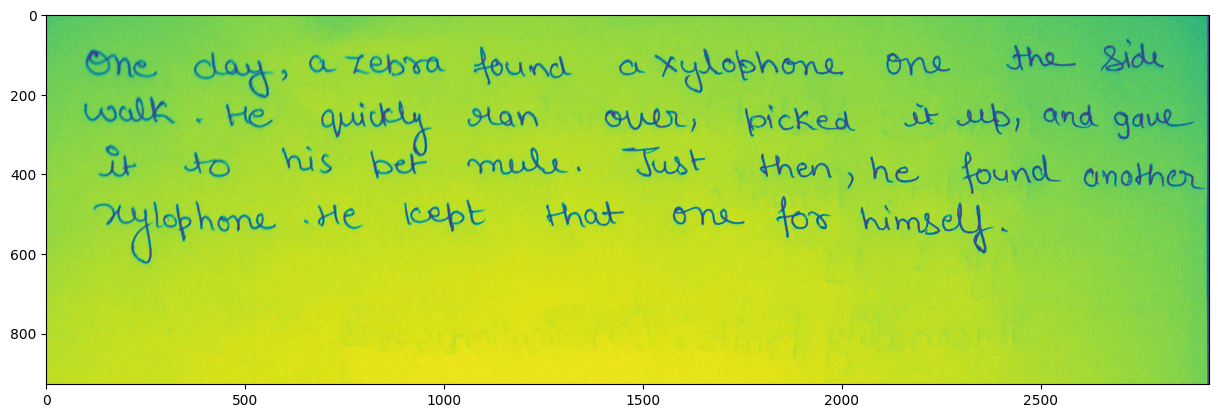

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][63])

In [ ]:
print(data.head())

                                               Array    Labels
0  [[180, 178, 177, 178, 176, 174, 177, 179, 178,...  Openness
1  [[149, 148, 149, 153, 149, 149, 150, 152, 152,...  Openness
2  [[173, 174, 174, 173, 174, 174, 173, 172, 172,...  Openness
3  [[157, 157, 156, 156, 157, 156, 155, 154, 157,...  Openness
4  [[170, 170, 169, 168, 169, 170, 170, 170, 170,...  Openness


# **TO protect main Data**

In [ ]:
SecondData = pd.concat([filepath,labels],axis=1)

In [ ]:
print(SecondData.head(50))

                                             Filepath    Labels
0   /content/drive/MyDrive/training_set/Openness/I...  Openness
1   /content/drive/MyDrive/training_set/Openness/I...  Openness
2   /content/drive/MyDrive/training_set/Openness/I...  Openness
3   /content/drive/MyDrive/training_set/Openness/I...  Openness
4   /content/drive/MyDrive/training_set/Openness/I...  Openness
5   /content/drive/MyDrive/training_set/Openness/I...  Openness
6   /content/drive/MyDrive/training_set/Openness/I...  Openness
7   /content/drive/MyDrive/training_set/Openness/I...  Openness
8   /content/drive/MyDrive/training_set/Openness/I...  Openness
9   /content/drive/MyDrive/training_set/Openness/I...  Openness
10  /content/drive/MyDrive/training_set/Openness/I...  Openness
11  /content/drive/MyDrive/training_set/Openness/I...  Openness
12  /content/drive/MyDrive/training_set/Openness/I...  Openness
13  /content/drive/MyDrive/training_set/Openness/I...  Openness
14  /content/drive/MyDrive/training_set/

# **X AND Y FRO MODEL**

In [ ]:
x = SecondData["Filepath"]
y = SecondData["Labels"]

In [ ]:
encode = LabelEncoder()

In [ ]:
x = encode.fit_transform(x)

In [ ]:
print(x)

[ 76  83  86  99  95  88  77  79  89  97  78  81  94  82  87  80  84  98
  85  91  92  96 100  90  93 101 125 115 119 106 110 118 112 121 107 103
 123 124 109 116 117 102 104 120 122 108 111 113 105 114  24  25  27  45
  32  35  41  39  26  37  29  33  31  43  30  42  38  34  40  36  44  28
   6  19  12  21  10  20  22   8   9  16  23   3  18   7  13  15  11  17
   4   1  14   5   0   2  52  69  65  70  72  75  62  58  73  66  67  55
  56  71  57  60  63  54  61  68  74  53  64  59  48  51  49  47  46  50]


In [ ]:
y = encode.fit_transform(y)

In [ ]:
print(y)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2]


In [ ]:
print(x.shape)

(126,)


In [ ]:
print(y.shape)

(126,)


In [ ]:
x = np.asarray(x).astype("float32")
x = x.reshape(126,1,1)

In [ ]:
y = np.asarray(y).astype("float32")
y = y.reshape(126,1,1)

In [ ]:
print(len(x))

126


In [ ]:
print(len(y))

126


# **SPILTING DATA**

In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
print(xTrain.shape)

(113, 1, 1)


In [ ]:
print(yTrain.shape)

(113, 1, 1)


In [ ]:
print(yTest.shape)

(13, 1, 1)


# **ANN MODEL CREATING**

In [ ]:
!pip install --upgrade tensorflow

import tensorflow as tf

ANNmodel = tf.keras.models.Sequential([
  # inputs
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(5, activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
ANNmodel.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

In [ ]:
MainModel = ANNmodel.fit(xTrain, yTrain,epochs=30, batch_size=5 ,validation_data=(xTest,yTest))

In [ ]:
result_Model = ANNmodel.evaluate(xTest,yTest)

In [ ]:
plt.plot(MainModel.history["accuracy"])
plt.plot(MainModel.history["val_accuracy"])
plt.ylabel("ACC")
plt.legend()
plt.show()

In [ ]:
HistoryDict = MainModel.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

In [ ]:
plt.plot(epochs,val_losses,"bo",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.show()

In [ ]:
test_image_path = "/content/drive/MyDrive/download.png"

In [ ]:
exp_rsz = exp_rsz.reshape(1,exp_rsz.shape[1],exp_rsz.shape[2],1)

In [ ]:
pred = ANNmodel.predict(exp_rsz)

In [ ]:
print(f"PREDICTION CLASS: {pred.argmax()}")